In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
wine_df = pd.read_csv('wine.csv',index_col=0)

In [79]:
wine_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.0              0.27         0.36            20.7      0.045   
2            6.3              0.30         0.34             1.6      0.049   
3            8.1              0.28         0.40             6.9      0.050   
4            7.2              0.23         0.32             8.5      0.058   
5            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 45.0                 170.0   1.0010  3.00       0.45   
2                 14.0                 132.0   0.9940  3.30       0.49   
3                 30.0                  97.0   0.9951  3.26       0.44   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality   wine  
1      8.8        6  white  
2      9.5        6  white  
3     10.1        6  white  
4      9.9        6  white  
5      9.9        6  white

In [80]:
wine_df.shape

(6494, 13)

In [81]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6494 entries, 1 to 6494
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6494 non-null   float64
 1   volatile.acidity      6494 non-null   float64
 2   citric.acid           6494 non-null   float64
 3   residual.sugar        6494 non-null   float64
 4   chlorides             6494 non-null   float64
 5   free.sulfur.dioxide   6494 non-null   float64
 6   total.sulfur.dioxide  6494 non-null   float64
 7   density               6494 non-null   float64
 8   pH                    6494 non-null   float64
 9   sulphates             6494 non-null   float64
 10  alcohol               6494 non-null   float64
 11  quality               6494 non-null   int64  
 12  wine                  6494 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.3+ KB


In [82]:
# Missing and Duplicate Values

wine_df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

In [83]:
wine_df[wine_df.duplicated(keep='last')]

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1               7.0             0.270         0.36            20.7      0.045   
2               6.3             0.300         0.34             1.6      0.049   
3               8.1             0.280         0.40             6.9      0.050   
4               7.2             0.230         0.32             8.5      0.058   
18              6.2             0.660         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
6458            7.2             0.695         0.13             2.0      0.076   
6459            7.2             0.695         0.13             2.0      0.076   
6460            7.2             0.695         0.13             2.0      0.076   
6475            6.2             0.560         0.09             1.7      0.053   
6488            6.3             0.510         0.13             2.3      0.076   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                    45.0                 170.0  1.00100  3.00       0.45   
2                    14.0                 132.0  0.99400  3.30       0.49   
3                    30.0                  97.0  0.99510  3.26       0.44   
4                    47.0                 186.0  0.99560  3.19       0.40   
18                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
6458                 12.0                  20.0  0.99546  3.29       0.54   
6459                 12.0                  20.0  0.99546  3.29       0.54   
6460                 12.0                  20.0  0.99546  3.29       0.54   
6475                 24.0                  32.0  0.99402  3.54       0.60   
6488                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality   wine  
1         8.8        6  white  
2         9.5        6  white  
3        10.1        6  white  
4         9.9        6  white  
18       12.8        8  white  
...       ...      ...    ...  
6458     10.1        5    red  
6459     10.1        5    red  
6460     10.1        5    red  
6475     11.3        5    red  
6488     11.0        6    red  

[1176 rows x 13 columns]

In [84]:
wine_df.drop_duplicates(keep='last',inplace=True)

In [85]:
wine_df.reset_index(inplace=True)

In [86]:
wine_df['quality_label'] = wine_df.quality.apply(lambda q: 'low' if q <= 5 else 'medium' if q <= 7 else 'high')

In [87]:
wine_df['quality_label'].value_counts()

medium    3179
low       1986
high       153
Name: quality_label, dtype: int64

In [88]:
wine_df['quality'].value_counts()

6    2323
5    1751
7     856
4     205
8     148
3      30
9       5
Name: quality, dtype: int64

In [89]:
wine_df.skew()

C:\Users\91956\AppData\Local\Temp/ipykernel_8208/3051102163.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wine_df.skew()


index                  -0.003089
fixed.acidity           1.621189
volatile.acidity        1.505170
citric.acid             0.470774
residual.sugar          1.706517
chlorides               5.027468
free.sulfur.dioxide     1.362371
total.sulfur.dioxide    0.062924
density                 0.667352
pH                      0.394467
sulphates               1.684733
alcohol                 0.540191
quality                 0.147725
dtype: float64

In [90]:
wine_df.kurt()

C:\Users\91956\AppData\Local\Temp/ipykernel_8208/2886475861.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wine_df.kurt()


index                   -1.240935
fixed.acidity            4.367842
volatile.acidity         2.864467
citric.acid              2.546604
residual.sugar           7.023661
chlorides               42.544418
free.sulfur.dioxide      9.516661
total.sulfur.dioxide    -0.299997
density                  8.724225
pH                       0.427224
sulphates                7.271587
alcohol                 -0.559044
quality                  0.299325
dtype: float64

In [91]:
# Data Visualization

C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wine', ylabel='count'>

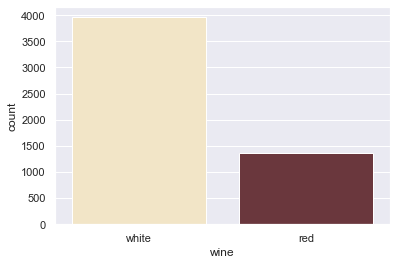

In [16]:
sns.set_theme(style='darkgrid',palette='deep')
sns.countplot(wine_df['wine'],palette=['#f9e8c0','#722F37'])

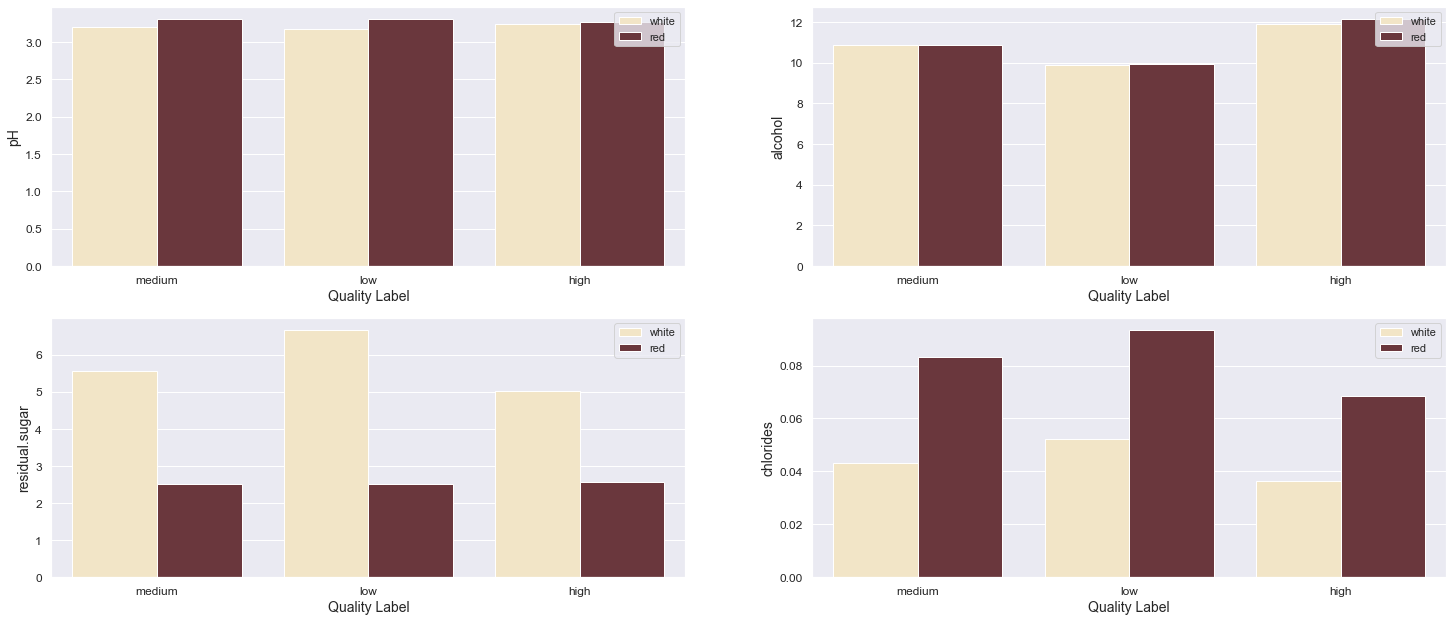

In [26]:
figure_cat = plt.figure(figsize=(25,10.5))
for ind,col in enumerate(['pH','alcohol','residual.sugar','chlorides']):
#     house_val = wine_df.groupby('quality_label')[col].mean().reset_index().sort_values(col,ascending=False)
    ax = figure_cat.add_subplot(2,2,ind+1)
    sns.barplot(y=col,x='quality_label',hue='wine',palette=['#f9e8c0','#722F37'],ci=False,data=wine_df)
    ax.legend(loc='upper right')
    ax.set_xlabel('Quality Label',fontdict={'fontsize': 14})
    ax.set_ylabel(col,fontdict={'fontsize': 14})
    ax.tick_params(axis='both',labelsize=12)

In [18]:
wine_df['free.sulfur.dioxide']

0       47.0
1       30.0
2       30.0
3       45.0
4       14.0
        ... 
5313    32.0
5314    39.0
5315    29.0
5316    32.0
5317    18.0
Name: free.sulfur.dioxide, Length: 5318, dtype: float64

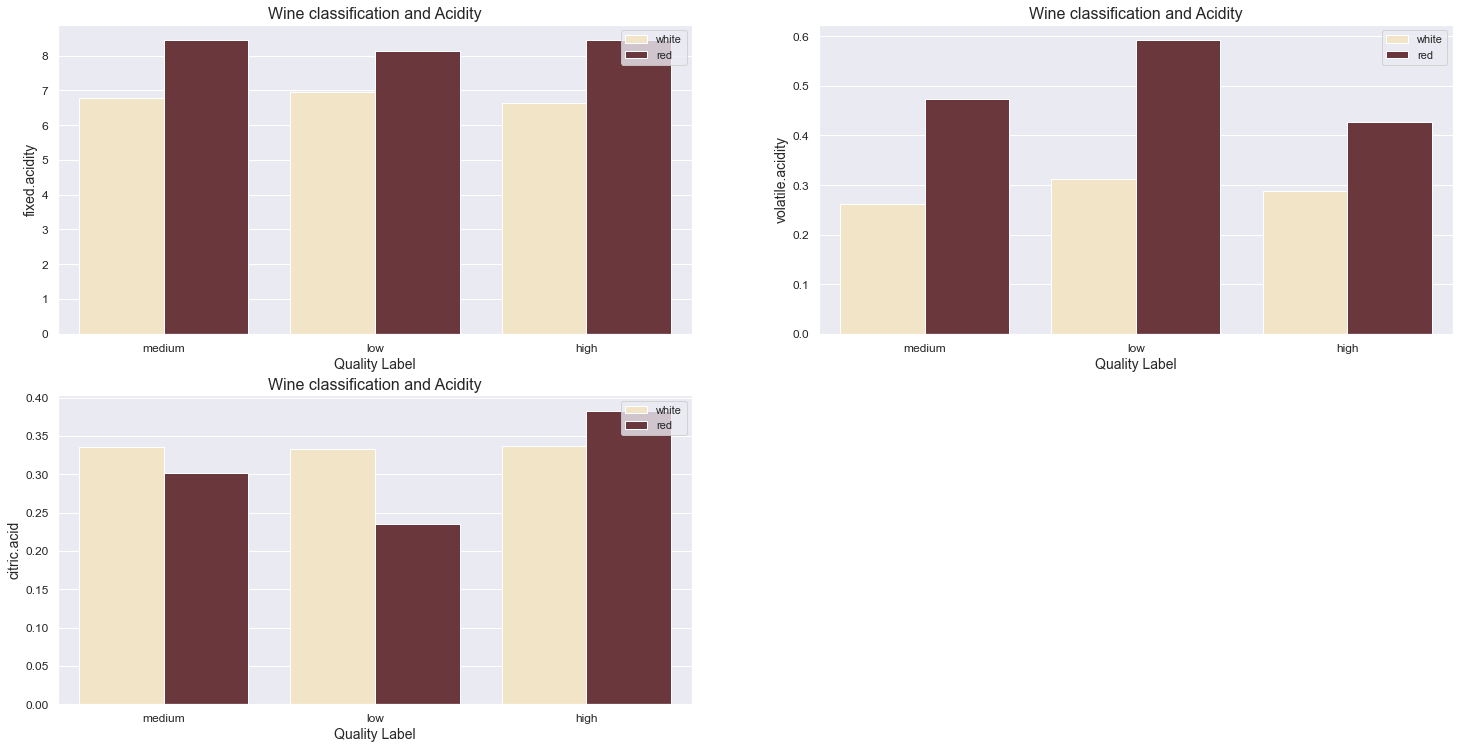

In [27]:
figure_cat = plt.figure(figsize=(25,12.5))
for ind,col in enumerate(['fixed.acidity','volatile.acidity','citric.acid']):
    ax = figure_cat.add_subplot(2,2,ind+1)
    sns.barplot(y=col,x='quality_label',hue='wine',palette=['#f9e8c0','#722F37'],ci=False,data=wine_df)
    ax.legend(loc='upper right')
    ax.set_xlabel('Quality Label',fontdict={'fontsize': 14})
    ax.set_ylabel(col,fontdict={'fontsize': 14})
    ax.tick_params(axis='both',labelsize=12)
    plt.title('Wine classification and Acidity',fontdict={'fontsize': 16})

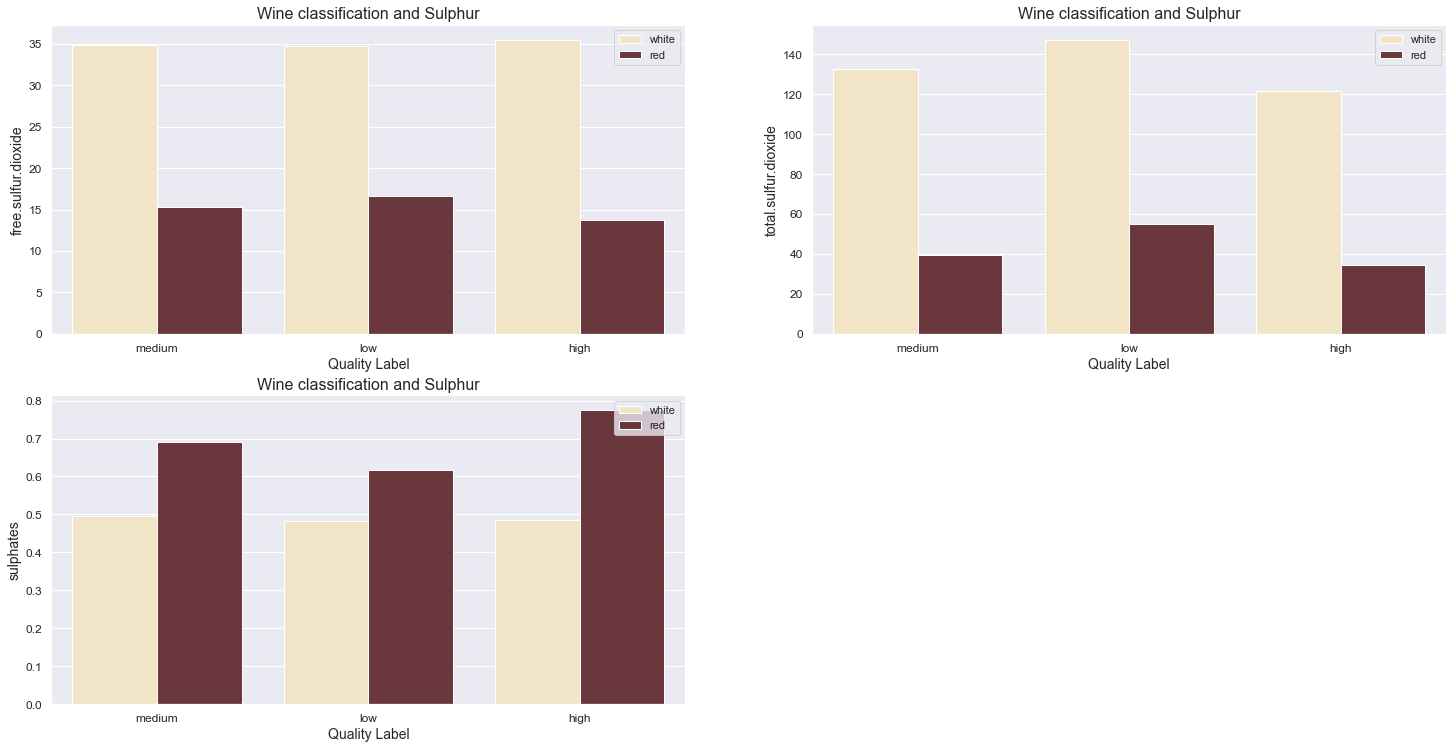

In [28]:
figure_cat = plt.figure(figsize=(25,12.5))
for ind,col in enumerate(['free.sulfur.dioxide','total.sulfur.dioxide','sulphates']):
    ax = figure_cat.add_subplot(2,2,ind+1)
    sns.barplot(y=col,x='quality_label',hue='wine',palette=['#f9e8c0','#722F37'],ci=False,data=wine_df)
    ax.legend(loc='upper right')
    ax.set_xlabel('Quality Label',fontdict={'fontsize': 14})
    ax.set_ylabel(col,fontdict={'fontsize': 14})
    ax.tick_params(axis='both',labelsize=12)
    plt.title('Wine classification and Sulphur',fontdict={'fontsize': 16})

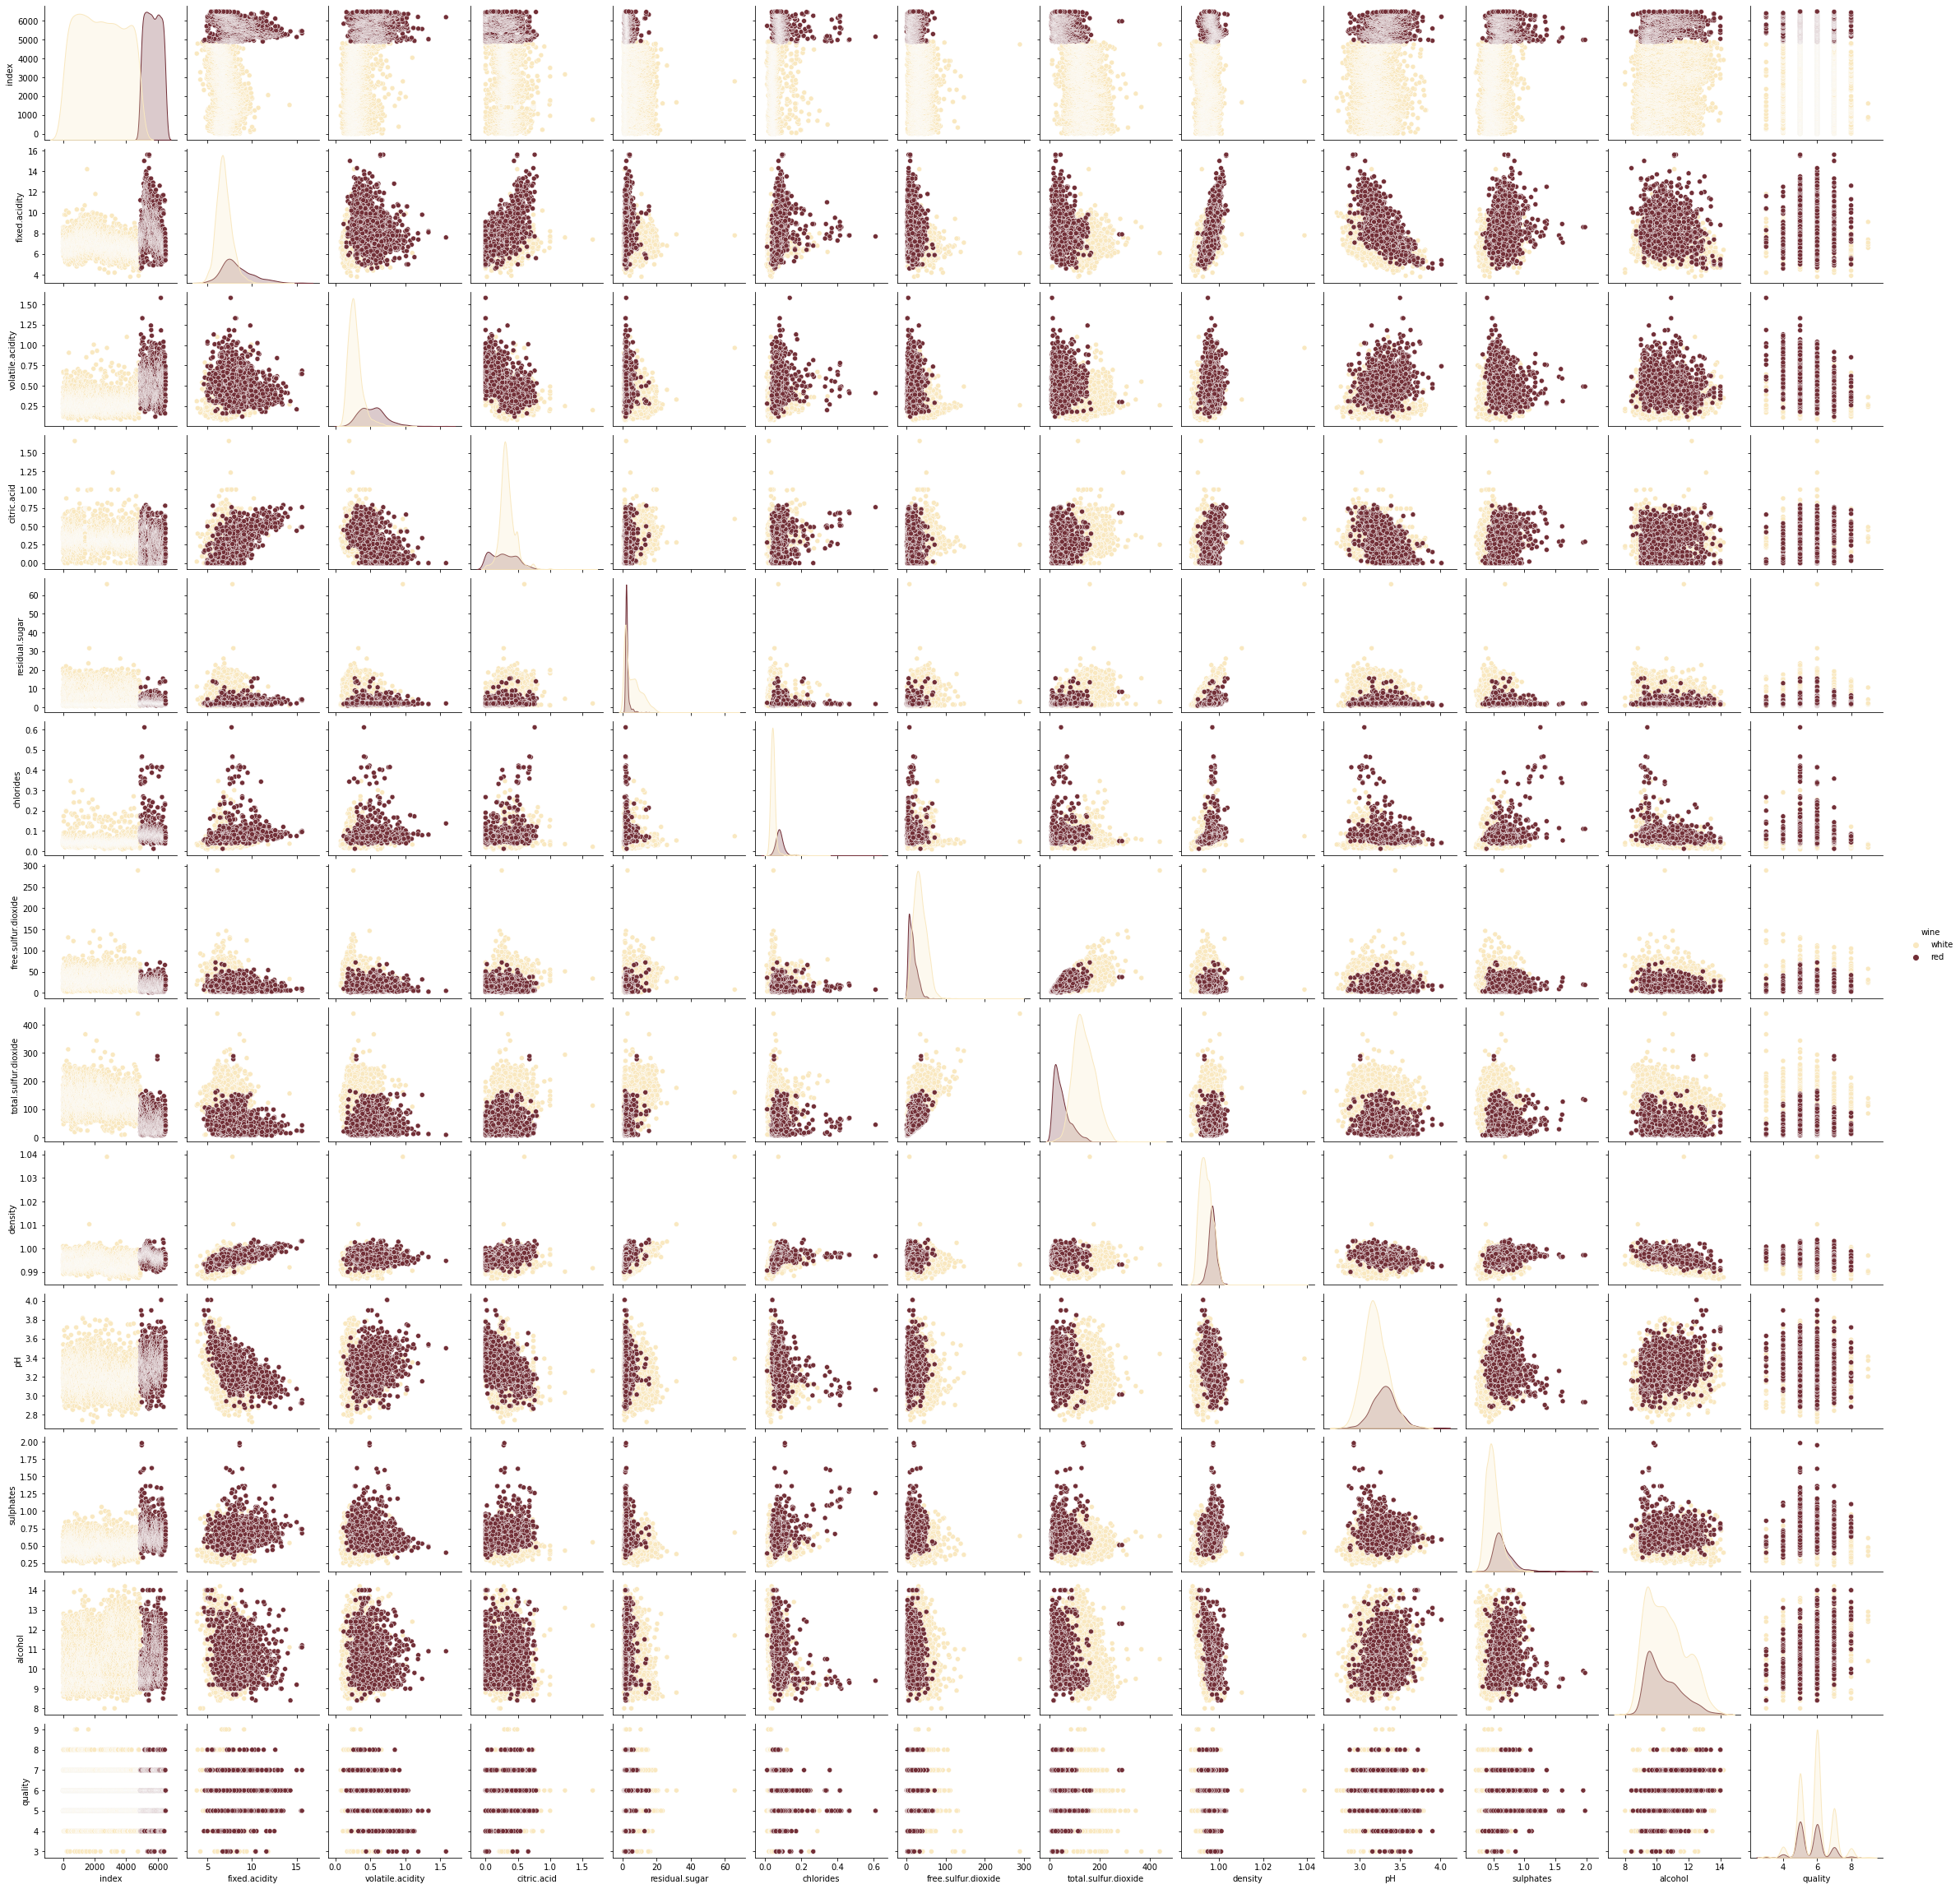

In [56]:
sns.pairplot(wine_df,hue='wine',kind='scatter',palette=['#f9e8c0','#722F37'])

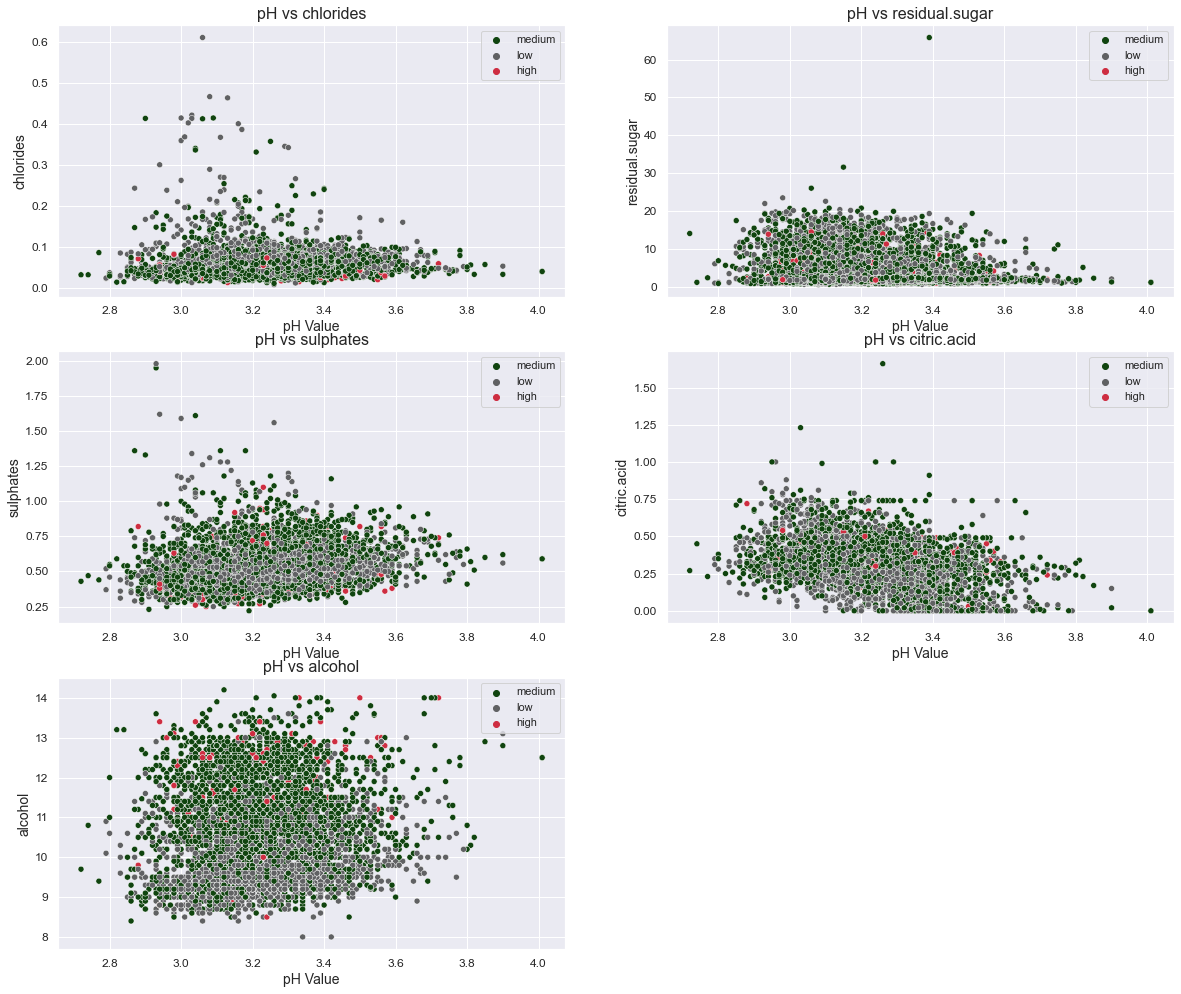

In [29]:
figure_cat = plt.figure(figsize=(20,17))
for ind,col in enumerate(['chlorides','residual.sugar','sulphates','citric.acid','alcohol']):
    ax = figure_cat.add_subplot(3,2,ind+1)
    sns.scatterplot(x='pH',y=col,hue='quality_label',palette=['#10440F','#606163','#CE2D41'],ci=False,data=wine_df)
    ax.legend(loc='upper right')
    ax.set_xlabel('pH Value',fontdict={'fontsize': 14})
    ax.set_ylabel(col,fontdict={'fontsize': 14})
    ax.tick_params(axis='both',labelsize=12)
    plt.title(f'pH vs {col}',fontdict={'fontsize': 16})

<AxesSubplot:>

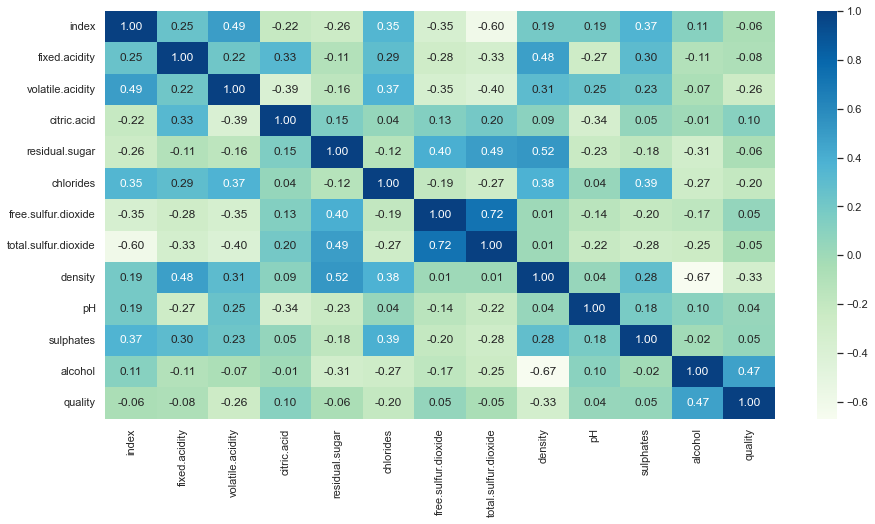

In [92]:
plt.figure(figsize=(15,7.5))
sns.heatmap(wine_df.corr(),annot=True, fmt=".2f",cmap="GnBu")

In [17]:
# Anomalies detection

In [18]:
from operator import add
def find_anomalies(data):
    anomalies = []
    
    for col in data:
        Q1 = np.percentile(data[col], 25,
                interpolation = 'midpoint')
 
        Q3 = np.percentile(data[col], 75,
                        interpolation = 'midpoint')
        IQR = Q3 - Q1
        
        print('Col:',col)
        
#         print('Q1:',Q1,'Q3:',Q3,'IQR:',IQR)

        upper = np.where(data[col] >= (Q3+1.5*IQR))

        lower = np.where(data[col] <= (Q1-1.5*IQR))

        print(lower[0])
        print(upper[0])
        
        try:
            if len(lower[0]) != 0 and len(lower[0]) > 0:
                for low_val in lower[0]:
                    anomalies.append(low_val)
            if len(upper[0]) != 0 and len(upper[0]) > 0:
                for up_val in upper[0]:
                    anomalies.append(up_val)
        except:
            pass
#     print(list(set(anomalies)))
    
    return list(set(anomalies))
    

In [19]:
outl_list = find_anomalies(wine_df.select_dtypes(include=['int64','float64']))

Col: index
[]
[]
Col: fixed.acidity
[2365 2676 3438 3572 3859 3860 3914]
[  83  142  176  304  729  950  995 1025 1045 1104 1162 1204 1287 1332
 1561 1595 1637 1713 1793 1800 1999 2539 3963 4013 4030 4063 4134 4142
 4145 4146 4148 4172 4174 4179 4180 4187 4192 4193 4196 4201 4202 4203
 4207 4208 4210 4212 4213 4215 4216 4217 4222 4227 4228 4230 4238 4241
 4242 4243 4244 4245 4246 4247 4251 4254 4255 4256 4257 4258 4259 4262
 4265 4268 4271 4272 4273 4274 4277 4278 4279 4280 4281 4282 4287 4288
 4289 4291 4301 4304 4305 4306 4310 4311 4314 4315 4316 4317 4321 4324
 4326 4334 4335 4337 4338 4340 4341 4343 4344 4345 4346 4349 4352 4356
 4359 4360 4363 4365 4366 4367 4369 4371 4373 4374 4375 4377 4380 4382
 4383 4384 4385 4386 4387 4394 4397 4398 4399 4400 4401 4402 4403 4404
 4405 4406 4407 4409 4410 4411 4412 4417 4421 4422 4423 4425 4427 4428
 4432 4433 4436 4437 4443 4444 4445 4449 4450 4452 4453 4455 4456 4457
 4458 4459 4462 4463 4464 4465 4466 4468 4471 4474 4477 4478 4480 4483
 448

In [20]:
len(outl_list) == len(set(outl_list))

True

In [21]:
for i in outl_list:
    wine_df.drop(i,inplace=True)
#     print(wine_df.iloc[[i]])

In [22]:
wine_df.shape

(4070, 15)

In [23]:
wine_df['wine'].value_counts()

white    3374
red       696
Name: wine, dtype: int64

In [24]:
wine_df.drop(['index','quality_label'],axis=1,inplace=True)

In [25]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [26]:
# Label Encoding 

In [27]:
label_encoder = LabelEncoder()

wine_df['wine']= label_encoder.fit_transform(wine_df['wine'])
  
wine_df['wine'].unique()

array([1, 0])

In [28]:
wine_df['wine'].value_counts()

1    3374
0     696
Name: wine, dtype: int64

In [29]:
# Scaling and Standardization

In [30]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_df.drop('wine',axis=1))

In [31]:
wine_df_scaled = pd.DataFrame(scaled_features,columns=wine_df.columns[:-1])
wine_df_scaled.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0       0.263616         -0.642376     0.114613        0.889037   0.545936   
1       1.265093         -0.246568     0.804279        0.491207   0.084506   
2      -0.849137          0.070078    -1.264720        0.516071  -0.203888   
3      -0.737861         -0.088245     0.287029       -0.826607   0.026827   
4       1.265093         -0.721538     1.062904       -0.851472  -0.261567   

   free.sulfur.dioxide  total.sulfur.dioxide   density        pH  sulphates  \
0             1.018493              1.273612  0.608791 -0.214752  -0.942403   
1            -0.054691             -0.452099  0.419498  0.254405  -0.595981   
2            -0.054691              0.304111  0.343781 -0.281774  -0.336165   
3            -1.064746              0.226551  0.003054  0.522495  -0.162954   
4            -0.180948              0.168381 -0.072663 -0.013684  -0.509376   

    alcohol  quality  
0 -0.596296   0.2672  
1 -0.424206   0.2672  
2 -0.854431   0.2672  
3 -0.940476   0.2672  
4  0.350199   0.2672

In [32]:
X = wine_df_scaled
y = wine_df['wine']

In [33]:
y.value_counts()

1    3374
0     696
Name: wine, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [36]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2849, 12) (2849,) (1221, 12) (1221,)


In [37]:
# Imbalanced data - SOMTETomek Resampling

In [38]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [39]:
res_smt = SMOTETomek(sampling_strategy='not majority',random_state=369)
X_train_res, y_train_res = res_smt.fit_resample(X_train, y_train)
print('Resampled %s' % Counter(y_train_res))

Resampled Counter({0: 2353, 1: 2353})


In [40]:
# K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import classification_report, confusion_matrix

In [257]:
sfs_md = SFS(KNeighborsClassifier(weights='uniform',metric='euclidean'),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [258]:
sfs_md.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=KNeighborsClassifier(metric='euclidean'),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [259]:
sfs_md.k_feature_names_

('residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol')

In [260]:
pd.DataFrame.from_dict(sfs_md.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (4, 6, 9)   
4                       (4, 6, 7, 9)   
5                   (4, 6, 7, 9, 10)   
6                (3, 4, 6, 7, 9, 10)   
7             (2, 3, 4, 6, 7, 9, 10)   
8          (0, 2, 3, 4, 6, 7, 9, 10)   
9      (0, 2, 3, 4, 6, 7, 9, 10, 11)   
10  (0, 2, 3, 4, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.8205944798301487, 0.953241232731137, 0.9521...  0.927137   
2   [0.9798301486199575, 0.9851222104144527, 0.982...  0.983639   
3   [0.9861995753715499, 0.9840595111583422, 0.991...  0.989163   
4   [0.9883227176220807, 0.9883103081827843, 0.994...  0.991288   
5   [0.9925690021231423, 0.9904357066950054, 0.997...  0.993625   
6   [0.9957537154989384, 0.9914984059511158, 0.997...   0.99575   
7   [0.9957537154989384, 0.9904357066950054, 0.997...  0.995325   
8   [0.9957537154989384, 0.9914984059511158, 0.996...  0.995325   
9   [0.9968152866242038, 0.9914984059511158, 0.994...  0.995325   
10  [0.994692144373673, 0.9904357066950054, 0.9957...  0.994688   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.068494   0.05329   
2                   (chlorides, total.sulfur.dioxide)  0.003177  0.002472   
3        (chlorides, total.sulfur.dioxide, sulphates)   0.00435  0.003385   
4   (chlorides, total.sulfur.dioxide, density, sul...  0.003386  0.002635   
5   (chlorides, total.sulfur.dioxide, density, sul...  0.003114  0.002423   
6   (residual.sugar, chlorides, total.sulfur.dioxi...  0.002992  0.002328   
7   (citric.acid, residual.sugar, chlorides, total...   0.00352  0.002739   
8   (fixed.acidity, citric.acid, residual.sugar, c...  0.003301  0.002568   
9   (fixed.acidity, citric.acid, residual.sugar, c...  0.002813  0.002189   
10  (fixed.acidity, citric.acid, residual.sugar, c...  0.002865  0.002229   

     std_err  
1   0.026645  
2   0.001236  
3   0.001692  
4   0.001317  
5   0.001211  
6   0.001164  
7   0.001369  
8   0.001284  
9   0.001094  
10  0.001115

In [261]:
X_train_fs = X_train_res[X_train[['residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol']].columns]

In [262]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i,weights='uniform',metric='euclidean')
    knn.fit(X_train_fs,y_train_res)
    pred_i = knn.predict(X_test[X_train_fs.columns])
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.00819000819000819 at K = 2


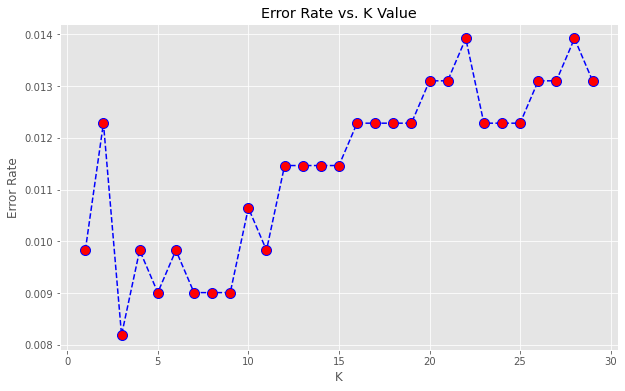

In [263]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='Blue',linestyle='--',marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [264]:
knn_model = KNeighborsClassifier(n_neighbors=2,weights='uniform',metric='euclidean')

knn_model.fit(X_train_fs,y_train_res)
pred_knn = knn_model.predict(X_test[X_train_fs.columns])

print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_knn))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_knn))

Confusion Matrix::


[[ 196    4]
 [  11 1010]]


Classification Report::


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       200
           1       1.00      0.99      0.99      1021

    accuracy                           0.99      1221
   macro avg       0.97      0.98      0.98      1221
weighted avg       0.99      0.99      0.99      1221



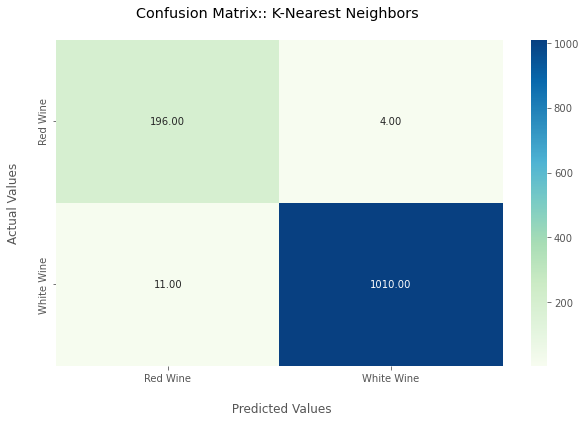

In [266]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: K-Nearest Neighbors \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [142]:
# Decision Tree

In [303]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [269]:
sfs_md_dt = SFS(DecisionTreeClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [270]:
sfs_md_dt.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [271]:
sfs_md_dt.k_feature_names_

('volatile.acidity',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality')

In [272]:
pd.DataFrame.from_dict(sfs_md_dt.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (1, 4, 6)   
4                       (1, 4, 6, 9)   
5                   (1, 4, 6, 9, 11)   
6               (1, 4, 6, 9, 10, 11)   
7            (1, 4, 6, 8, 9, 10, 11)   
8         (1, 4, 6, 7, 8, 9, 10, 11)   
9      (0, 1, 3, 4, 6, 8, 9, 10, 11)   
10  (0, 1, 3, 4, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.7876857749469215, 0.9628055260361318, 0.963...  0.929269   
2   [0.9723991507430998, 0.975557917109458, 0.9766...  0.976839   
3   [0.9787685774946921, 0.9840595111583422, 0.984...  0.984914   
4   [0.975583864118896, 0.9872476089266737, 0.9893...  0.988103   
5   [0.9745222929936306, 0.9893730074388948, 0.990...  0.988103   
6   [0.9798301486199575, 0.9893730074388948, 0.988...  0.988952   
7   [0.9766454352441614, 0.9883103081827843, 0.993...  0.988953   
8   [0.9798301486199575, 0.9904357066950054, 0.991...  0.989377   
9   [0.975583864118896, 0.9904357066950054, 0.9904...  0.988741   
10  [0.9766454352441614, 0.9893730074388948, 0.991...  0.988315   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.091104  0.070882   
2                   (chlorides, total.sulfur.dioxide)  0.007033  0.005472   
3   (volatile.acidity, chlorides, total.sulfur.dio...  0.006186  0.004813   
4   (volatile.acidity, chlorides, total.sulfur.dio...  0.008857  0.006891   
5   (volatile.acidity, chlorides, total.sulfur.dio...  0.008939  0.006955   
6   (volatile.acidity, chlorides, total.sulfur.dio...  0.006489  0.005049   
7   (volatile.acidity, chlorides, total.sulfur.dio...  0.008566  0.006665   
8   (volatile.acidity, chlorides, total.sulfur.dio...  0.006278  0.004885   
9   (fixed.acidity, volatile.acidity, residual.sug...  0.008651  0.006731   
10  (fixed.acidity, volatile.acidity, residual.sug...  0.007617  0.005926   

     std_err  
1   0.035441  
2   0.002736  
3   0.002406  
4   0.003445  
5   0.003477  
6   0.002524  
7   0.003332  
8   0.002442  
9   0.003366  
10  0.002963

In [273]:
X_train_fs_dt = X_train_res[X_train[['volatile.acidity',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']].columns]

In [292]:
dt_param_grid = {'criterion':['gini','entropy'],
                'max_depth':range(1,10),
                'max_features':range(1,10),
                'min_samples_split':range(2,10),
                'min_samples_leaf':range(1,5)}

In [293]:
dt_grid_cv = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_param_grid,cv=5,verbose=1,n_jobs=-1)

In [294]:
dt_grid_cv.fit(X_train_fs_dt,y_train_res)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [295]:
dt_grid_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features=4,
                       min_samples_leaf=2, min_samples_split=6)

In [296]:
dt_grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [297]:
dt_grid_cv.best_score_

0.9917136533163664

In [300]:
pred_dt = dt_grid_cv.predict(X_test[X_train_fs_dt.columns])

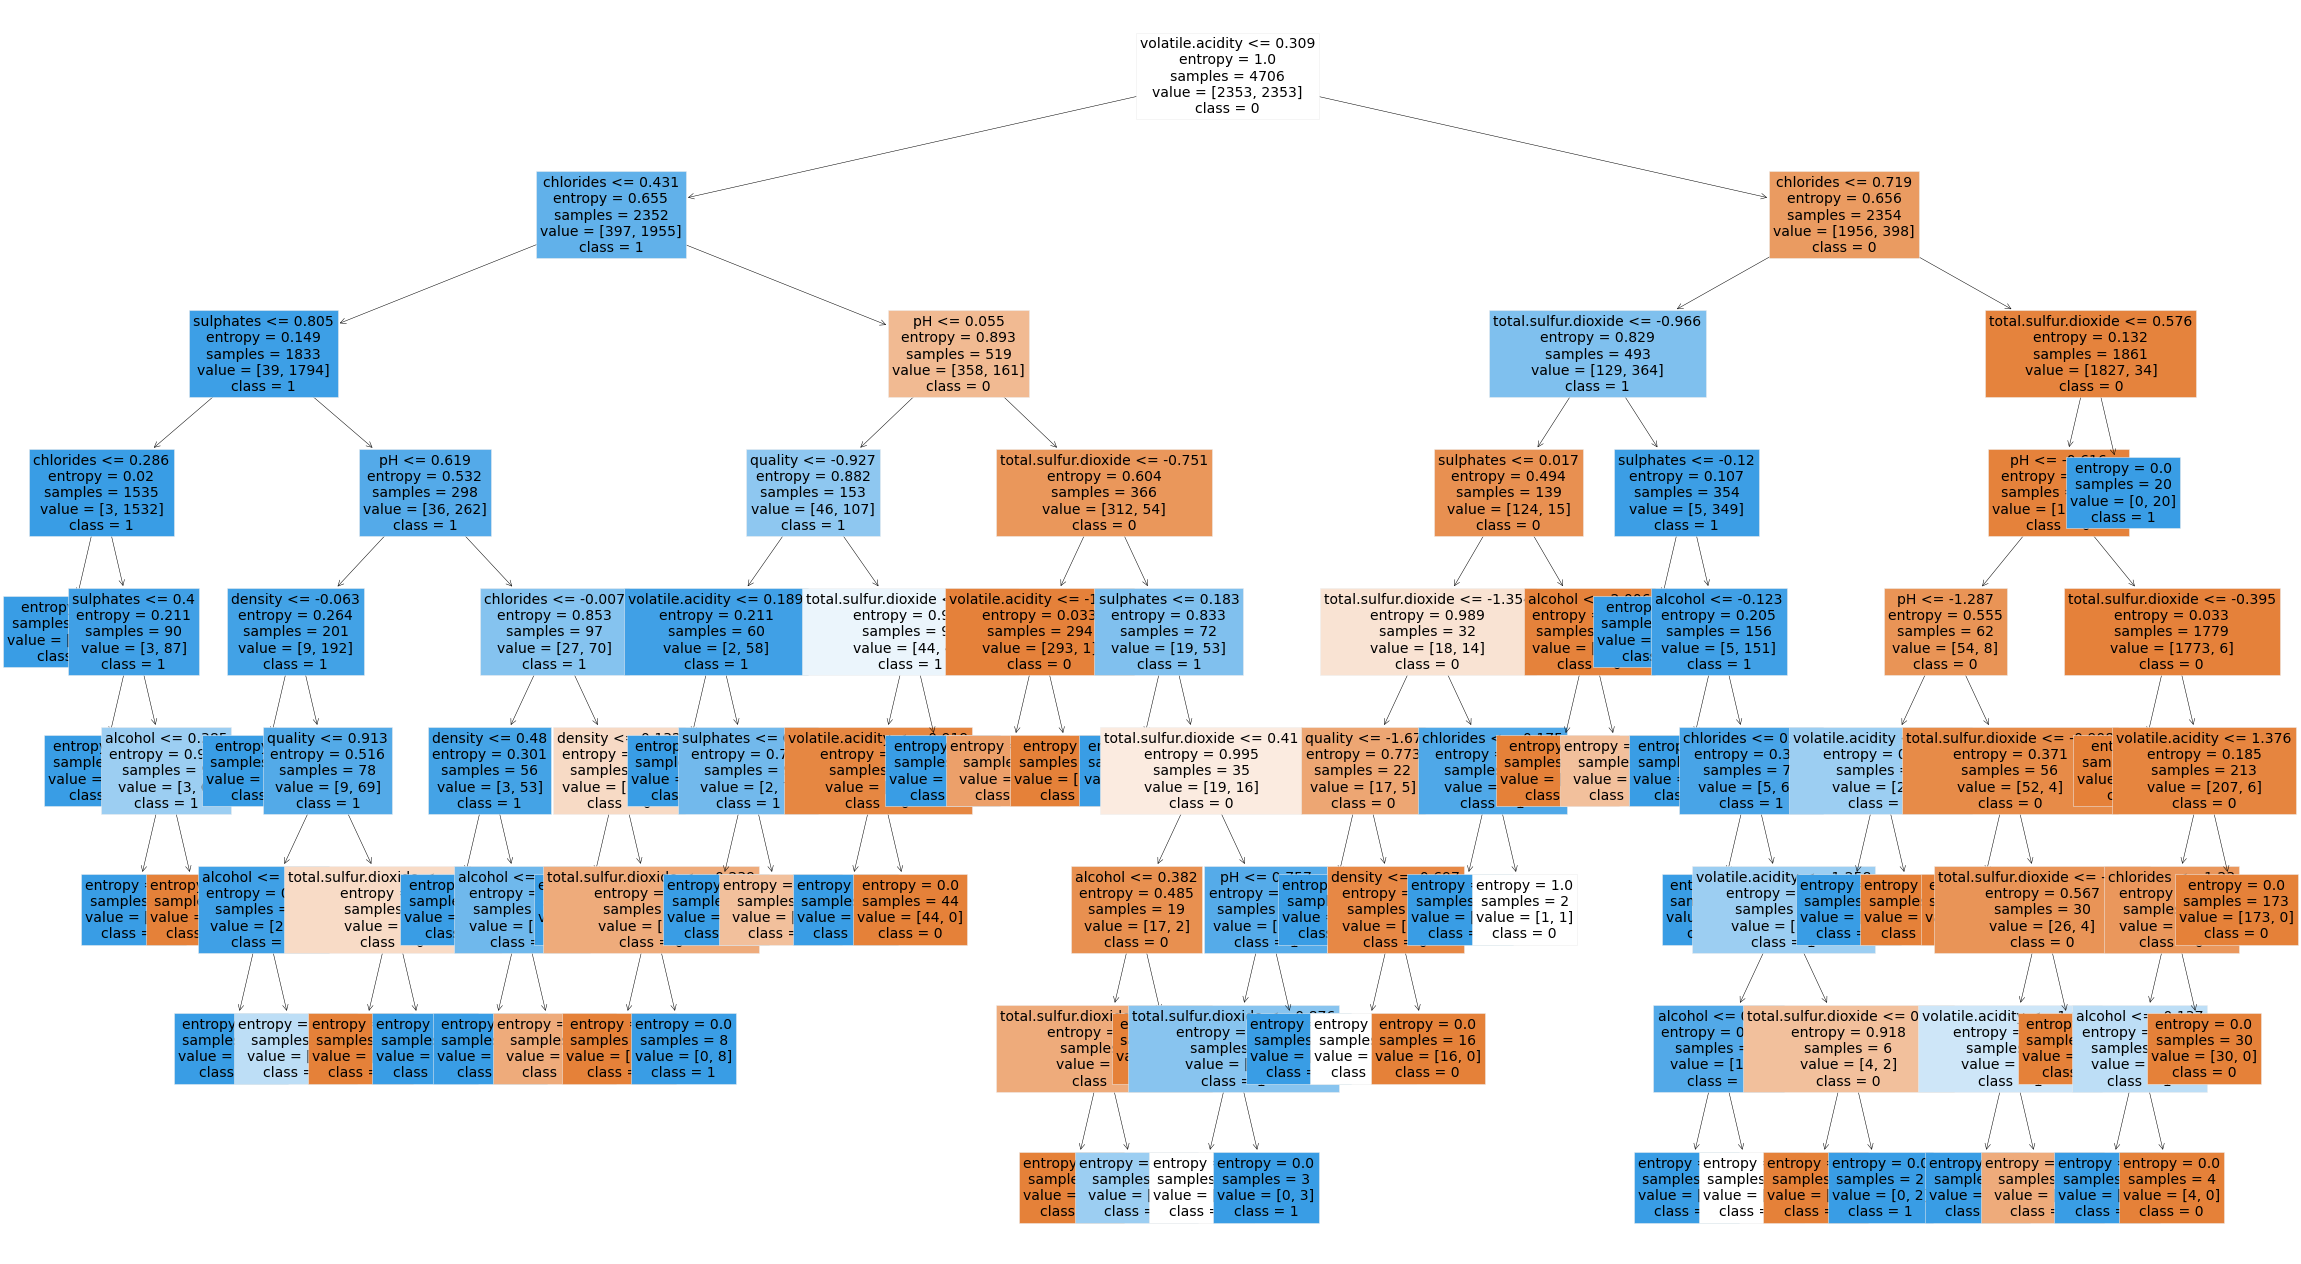

In [322]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(40,23))
tree_plot = plot_tree(dt_model,feature_names=X_train_fs_dt.columns.values.tolist(),class_names=['0','1'],filled=True,fontsize=14)

In [301]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_dt))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_dt))

Confusion Matrix::


[[ 192    8]
 [  17 1004]]


Classification Report::


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       200
           1       0.99      0.98      0.99      1021

    accuracy                           0.98      1221
   macro avg       0.96      0.97      0.96      1221
weighted avg       0.98      0.98      0.98      1221



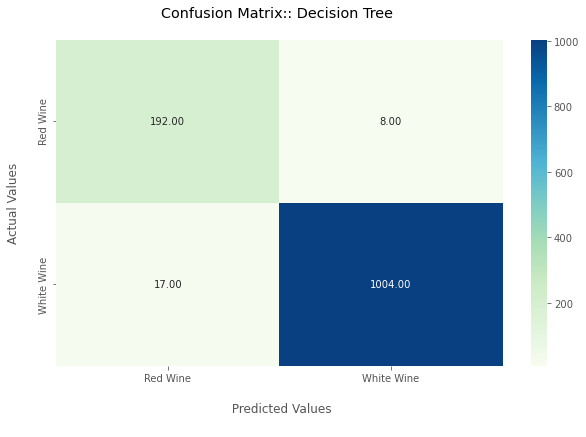

In [323]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_dt), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: Decision Tree \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [52]:
# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
sfs_md_rf = SFS(RandomForestClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [45]:
sfs_md_rf.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [46]:
sfs_md_rf.k_feature_names_

('volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol')

In [50]:
pd.DataFrame.from_dict(sfs_md_rf.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (4, 6, 9)   
4                       (1, 4, 6, 9)   
5                    (1, 4, 6, 7, 9)   
6                 (1, 3, 4, 6, 7, 9)   
7             (1, 3, 4, 6, 7, 9, 10)   
8         (1, 3, 4, 6, 7, 9, 10, 11)   
9      (1, 3, 4, 6, 7, 8, 9, 10, 11)   
10  (1, 3, 4, 5, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.7770700636942676, 0.9606801275239107, 0.965...  0.927359   
2   [0.9766454352441614, 0.9861849096705633, 0.985...  0.983852   
3   [0.9840764331210191, 0.9883103081827843, 0.991...  0.990864   
4   [0.9893842887473461, 0.9893730074388948, 0.993...  0.993201   
5   [0.9893842887473461, 0.9936238044633369, 0.996...  0.994901   
6   [0.9915074309978769, 0.9936238044633369, 0.996...  0.995538   
7   [0.9925690021231423, 0.9957492029755579, 0.996...  0.996601   
8   [0.9925690021231423, 0.9957492029755579, 0.996...  0.996388   
9   [0.9915074309978769, 0.9936238044633369, 0.996...  0.995964   
10  [0.9925690021231423, 0.9957492029755579, 0.996...  0.996601   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.096702  0.075237   
2                   (chlorides, total.sulfur.dioxide)  0.005128   0.00399   
3        (chlorides, total.sulfur.dioxide, sulphates)  0.005632  0.004382   
4   (volatile.acidity, chlorides, total.sulfur.dio...  0.004281  0.003331   
5   (volatile.acidity, chlorides, total.sulfur.dio...  0.004174  0.003247   
6   (volatile.acidity, residual.sugar, chlorides, ...  0.003386  0.002635   
7   (volatile.acidity, residual.sugar, chlorides, ...  0.003159  0.002458   
8   (volatile.acidity, residual.sugar, chlorides, ...  0.003063  0.002383   
9   (volatile.acidity, residual.sugar, chlorides, ...  0.003898  0.003033   
10  (volatile.acidity, residual.sugar, chlorides, ...  0.003159  0.002458   

     std_err  
1   0.037619  
2   0.001995  
3   0.002191  
4   0.001665  
5   0.001624  
6   0.001317  
7   0.001229  
8   0.001192  
9   0.001517  
10  0.001229

In [48]:
X_train_fs_rf = X_train_res[X_train[['volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol']].columns]

In [49]:
rf_param_grid = {'n_estimators':[25,50,100],
                'max_depth':range(1,10),
                'max_features':range(1,10),
                'min_samples_split':range(2,10),
                'min_samples_leaf':range(1,5)}

In [50]:
rf_grid_cv = GridSearchCV(RandomForestClassifier(),param_grid=rf_param_grid,cv=5,verbose=1,n_jobs=-1)

In [51]:
rf_grid_cv.fit(X_train_fs_rf,y_train_res)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_features': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [25, 50, 100]},
             verbose=1)

In [52]:
rf_grid_cv.best_estimator_

RandomForestClassifier(max_depth=8, max_features=2, n_estimators=50)

In [53]:
rf_grid_cv.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [54]:
rf_grid_cv.best_score_

0.9966007161374606

In [55]:
pred_rf = rf_grid_cv.predict(X_test[X_train_fs_rf.columns])

In [56]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_rf))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_rf))

Confusion Matrix::


[[ 194    6]
 [   2 1019]]


Classification Report::


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       200
           1       0.99      1.00      1.00      1021

    accuracy                           0.99      1221
   macro avg       0.99      0.98      0.99      1221
weighted avg       0.99      0.99      0.99      1221



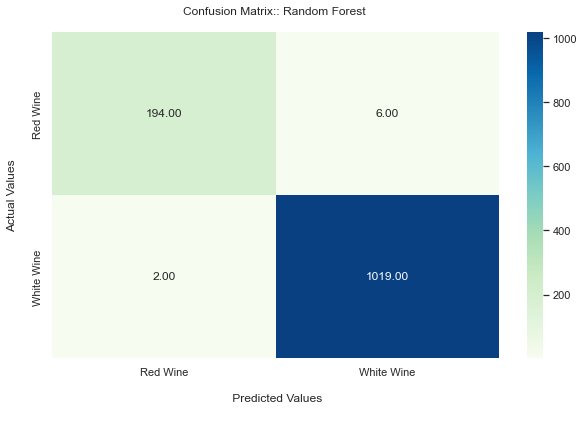

In [57]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_rf), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: Random Forest \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [144]:
# Gradient Boosting

In [38]:
from xgboost import XGBClassifier

In [39]:
sfs_md_gb = SFS(XGBClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [40]:
sfs_md_gb.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=369, ...),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [41]:
sfs_md_gb.k_feature_names_

('fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality')

In [42]:
pd.DataFrame.from_dict(sfs_md_gb.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (4, 6, 9)   
4                       (1, 4, 6, 9)   
5                    (1, 4, 6, 7, 9)   
6                (1, 4, 6, 7, 9, 10)   
7             (0, 1, 4, 6, 7, 9, 10)   
8          (0, 1, 4, 5, 6, 7, 9, 10)   
9       (0, 1, 3, 4, 5, 6, 7, 9, 10)   
10  (0, 1, 3, 4, 5, 6, 7, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.851380042462845, 0.9628055260361318, 0.9638...  0.940946   
2   [0.9745222929936306, 0.9851222104144527, 0.982...  0.983215   
3   [0.9808917197452229, 0.9904357066950054, 0.993...  0.989802   
4   [0.9861995753715499, 0.9904357066950054, 0.993...  0.992564   
5   [0.9861995753715499, 0.9925611052072264, 0.995...  0.994052   
6   [0.9893842887473461, 0.9936238044633369, 0.995...  0.995326   
7   [0.9883227176220807, 0.9946865037194474, 0.997...  0.995964   
8   [0.9893842887473461, 0.9936238044633369, 0.998...  0.996177   
9   [0.9904458598726115, 0.9946865037194474, 0.996...  0.996176   
10  [0.9904458598726115, 0.9946865037194474, 0.998...  0.996389   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.057756  0.044936   
2                   (chlorides, total.sulfur.dioxide)  0.005997  0.004666   
3        (chlorides, total.sulfur.dioxide, sulphates)  0.006604  0.005138   
4   (volatile.acidity, chlorides, total.sulfur.dio...  0.004956  0.003856   
5   (volatile.acidity, chlorides, total.sulfur.dio...  0.005697  0.004433   
6   (volatile.acidity, chlorides, total.sulfur.dio...  0.004695  0.003653   
7   (fixed.acidity, volatile.acidity, chlorides, t...  0.005417  0.004214   
8   (fixed.acidity, volatile.acidity, chlorides, f...  0.005221  0.004062   
9   (fixed.acidity, volatile.acidity, residual.sug...  0.004366  0.003397   
10  (fixed.acidity, volatile.acidity, residual.sug...  0.004451  0.003463   

     std_err  
1   0.022468  
2   0.002333  
3   0.002569  
4   0.001928  
5   0.002216  
6   0.001827  
7   0.002107  
8   0.002031  
9   0.001699  
10  0.001731

In [43]:
X_train_fs_gb = X_train_res[X_train[['fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'sulphates',
 'alcohol',
 'quality']].columns]

In [44]:
gb_param_grid = {'n_estimators':[25,50,100],
                 'max_depth':range(1,10),
                 'learning_rate':[0.01,0.05,0.1],
                  'subsample': [i/10.0 for i in range(1, 3)],
                  'colsample_bytree':[i/10.0 for i in range(1, 3)],
                  'gamma':[i/10.0 for i in range(3)]}

In [46]:
gb_grid_cv = GridSearchCV(XGBClassifier(objective='binary:logistic',nthread=4,seed=369),param_grid=gb_param_grid,cv=5,verbose=1,n_jobs=-1)

In [48]:
gb_grid_cv.fit(X_train_fs_gb,y_train_res)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.2],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': range(1, 10),
                         'n_estimators': [25, 50, 100],
                         'subsample': [0.1, 0.2]},
             verbose=1)

In [49]:
gb_grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [50]:
gb_grid_cv.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.2}

In [51]:
gb_grid_cv.best_score_

0.9938386005762492

In [53]:
pred_gb = gb_grid_cv.predict(X_test[X_train_fs_gb.columns])

In [56]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_gb))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_gb))

Confusion Matrix::


[[ 194    6]
 [   4 1017]]


Classification Report::


              precision    recall  f1-score   support

           0       0.98      0.97      0.97       200
           1       0.99      1.00      1.00      1021

    accuracy                           0.99      1221
   macro avg       0.99      0.98      0.98      1221
weighted avg       0.99      0.99      0.99      1221



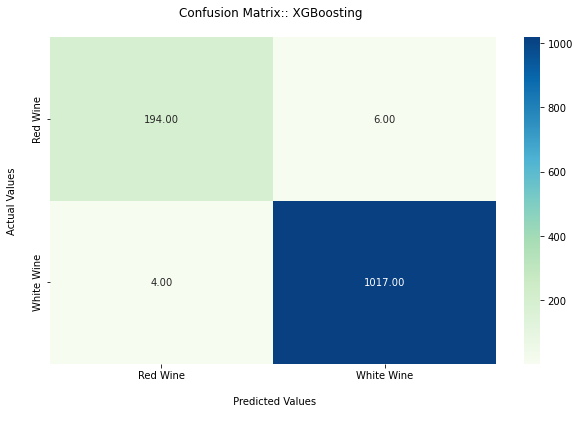

In [57]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_gb), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: XGBoosting \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [58]:
# Neural Networks

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
sfs_md_nn = SFS(MLPClassifier(max_iter=500,random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [61]:
sfs_md_nn.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=MLPClassifier(max_iter=500,
                                                  random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [62]:
sfs_md_nn.k_feature_names_

('fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality')

In [63]:
pd.DataFrame.from_dict(sfs_md_nn.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (4, 6, 9)   
4                       (1, 4, 6, 9)   
5                   (1, 4, 6, 9, 10)   
6                (1, 4, 6, 7, 9, 10)   
7             (0, 3, 4, 6, 7, 9, 10)   
8          (0, 3, 4, 6, 7, 8, 9, 10)   
9       (0, 1, 3, 4, 6, 7, 8, 9, 10)   
10  (0, 1, 3, 4, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.9118895966029724, 0.9341126461211477, 0.933...  0.930518   
2   [0.975583864118896, 0.9851222104144527, 0.9776...  0.981939   
3   [0.9819532908704883, 0.9872476089266737, 0.991...  0.988952   
4   [0.9883227176220807, 0.9883103081827843, 0.992...  0.992564   
5   [0.9925690021231423, 0.9893730074388948, 0.993...  0.994688   
6   [0.9936305732484076, 0.9914984059511158, 0.996...  0.995963   
7   [0.9936305732484076, 0.9936238044633369, 1.0, ...  0.997026   
8   [0.9936305732484076, 0.9936238044633369, 1.0, ...  0.996813   
9   [0.994692144373673, 0.9936238044633369, 1.0, 0...  0.996813   
10  [0.9957537154989384, 0.9936238044633369, 1.0, ...  0.997663   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.013742  0.010692   
2                   (chlorides, total.sulfur.dioxide)  0.006038  0.004698   
3        (chlorides, total.sulfur.dioxide, sulphates)  0.005218   0.00406   
4   (volatile.acidity, chlorides, total.sulfur.dio...  0.004883  0.003799   
5   (volatile.acidity, chlorides, total.sulfur.dio...  0.004809  0.003741   
6   (volatile.acidity, chlorides, total.sulfur.dio...  0.003804  0.002959   
7   (fixed.acidity, residual.sugar, chlorides, tot...  0.003703  0.002881   
8   (fixed.acidity, residual.sugar, chlorides, tot...  0.003663   0.00285   
9   (fixed.acidity, volatile.acidity, residual.sug...  0.003113  0.002422   
10  (fixed.acidity, volatile.acidity, residual.sug...  0.003277   0.00255   

     std_err  
1   0.005346  
2   0.002349  
3    0.00203  
4     0.0019  
5   0.001871  
6    0.00148  
7   0.001441  
8   0.001425  
9   0.001211  
10  0.001275

In [64]:
X_train_fs_nn = X_train_res[X_train[['fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']].columns]

In [66]:
nn_param_grid = {'hidden_layer_sizes':[(10,),(20,)],
                 'activation':['tanh','relu'],
                 'learning_rate':['constant','adaptive'],
                 'solver':['sgd','adam'],
                  'alpha': [0.0001,0.05]}

In [68]:
nn_grid_cv = GridSearchCV(MLPClassifier(max_iter=100,random_state=369),param_grid=nn_param_grid,cv=5,verbose=1,n_jobs=-1)

In [69]:
nn_grid_cv.fit(X_train_fs_nn,y_train_res)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=369),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [49]:
nn_grid_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...)

In [50]:
gb_grid_cv.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.2}

In [51]:
gb_grid_cv.best_score_

0.9938386005762492

In [53]:
pred_gb = gb_grid_cv.predict(X_test[X_train_fs_gb.columns])

In [95]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_nn))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_nn))

Confusion Matrix::


[[ 196    4]
 [   3 1018]]


Classification Report::


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       1.00      1.00      1.00      1021

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



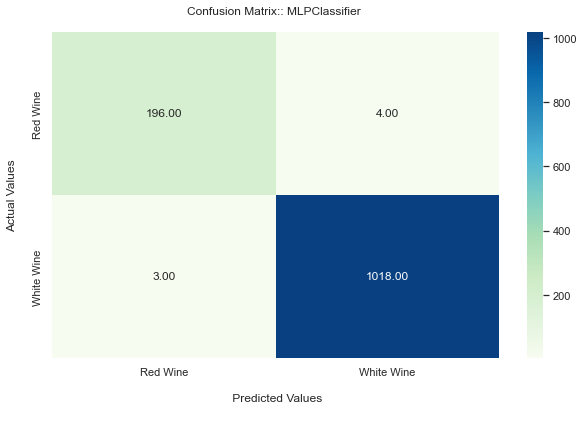

In [94]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_nn), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: MLPClassifier \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [58]:
# Neural Networks

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
sfs_md_nn = SFS(MLPClassifier(max_iter=500,random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [61]:
sfs_md_nn.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=MLPClassifier(max_iter=500,
                                                  random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [62]:
sfs_md_nn.k_feature_names_

('fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality')

In [63]:
pd.DataFrame.from_dict(sfs_md_nn.get_metric_dict()).T

feature_idx  \
1                               (4,)   
2                             (4, 6)   
3                          (4, 6, 9)   
4                       (1, 4, 6, 9)   
5                   (1, 4, 6, 9, 10)   
6                (1, 4, 6, 7, 9, 10)   
7             (0, 3, 4, 6, 7, 9, 10)   
8          (0, 3, 4, 6, 7, 8, 9, 10)   
9       (0, 1, 3, 4, 6, 7, 8, 9, 10)   
10  (0, 1, 3, 4, 6, 7, 8, 9, 10, 11)   

                                            cv_scores avg_score  \
1   [0.9118895966029724, 0.9341126461211477, 0.933...  0.930518   
2   [0.975583864118896, 0.9851222104144527, 0.9776...  0.981939   
3   [0.9819532908704883, 0.9872476089266737, 0.991...  0.988952   
4   [0.9883227176220807, 0.9883103081827843, 0.992...  0.992564   
5   [0.9925690021231423, 0.9893730074388948, 0.993...  0.994688   
6   [0.9936305732484076, 0.9914984059511158, 0.996...  0.995963   
7   [0.9936305732484076, 0.9936238044633369, 1.0, ...  0.997026   
8   [0.9936305732484076, 0.9936238044633369, 1.0, ...  0.996813   
9   [0.994692144373673, 0.9936238044633369, 1.0, 0...  0.996813   
10  [0.9957537154989384, 0.9936238044633369, 1.0, ...  0.997663   

                                        feature_names  ci_bound   std_dev  \
1                                        (chlorides,)  0.013742  0.010692   
2                   (chlorides, total.sulfur.dioxide)  0.006038  0.004698   
3        (chlorides, total.sulfur.dioxide, sulphates)  0.005218   0.00406   
4   (volatile.acidity, chlorides, total.sulfur.dio...  0.004883  0.003799   
5   (volatile.acidity, chlorides, total.sulfur.dio...  0.004809  0.003741   
6   (volatile.acidity, chlorides, total.sulfur.dio...  0.003804  0.002959   
7   (fixed.acidity, residual.sugar, chlorides, tot...  0.003703  0.002881   
8   (fixed.acidity, residual.sugar, chlorides, tot...  0.003663   0.00285   
9   (fixed.acidity, volatile.acidity, residual.sug...  0.003113  0.002422   
10  (fixed.acidity, volatile.acidity, residual.sug...  0.003277   0.00255   

     std_err  
1   0.005346  
2   0.002349  
3    0.00203  
4     0.0019  
5   0.001871  
6    0.00148  
7   0.001441  
8   0.001425  
9   0.001211  
10  0.001275

In [64]:
X_train_fs_nn = X_train_res[X_train[['fixed.acidity',
 'volatile.acidity',
 'residual.sugar',
 'chlorides',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']].columns]

In [66]:
nn_param_grid = {'hidden_layer_sizes':[(10,),(20,)],
                 'activation':['tanh','relu'],
                 'learning_rate':['constant','adaptive'],
                 'solver':['sgd','adam'],
                  'alpha': [0.0001,0.05]}

In [68]:
nn_grid_cv = GridSearchCV(MLPClassifier(max_iter=100,random_state=369),param_grid=nn_param_grid,cv=5,verbose=1,n_jobs=-1)

In [69]:
nn_grid_cv.fit(X_train_fs_nn,y_train_res)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


C:\Users\91956\Srinivas Shanmuga G\E-learning\Python\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100, random_state=369),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10,), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=1)

In [70]:
nn_grid_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, random_state=369)

In [71]:
nn_grid_cv.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [72]:
nn_grid_cv.best_score_

0.9940506891751333

In [73]:
pred_nn = nn_grid_cv.predict(X_test[X_train_fs_nn.columns])

In [74]:
print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred_nn))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_nn))

Confusion Matrix::


[[ 196    4]
 [   3 1018]]


Classification Report::


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       200
           1       1.00      1.00      1.00      1021

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



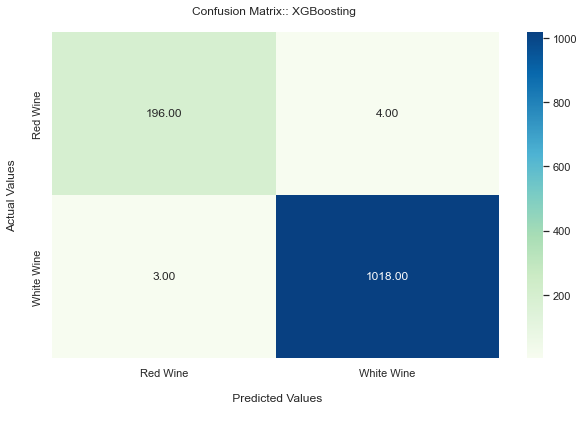

In [75]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_nn), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: XGBoosting \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Red Wine','White Wine'])
fx.yaxis.set_ticklabels(['Red Wine','White Wine'])
plt.show()

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,pred_nn)

0.9942669942669943